In [2]:
# For the assignment and this exercise we will use the url approach to ease correcting of assignments
IMG_URL = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg" 

In [3]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
from urllib.request import urlopen, Request

In [16]:
def img_via_url():
    # Returns a Numpy Array with RGB colors
    URL = IMG_URL
    HEADER = {'User-Agent': 'Mozilla/5.0'}
    with urlopen(URL) as req:
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        BGR_img = cv2.imdecode(arr, -1) 
        
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
        
    return RGB_img


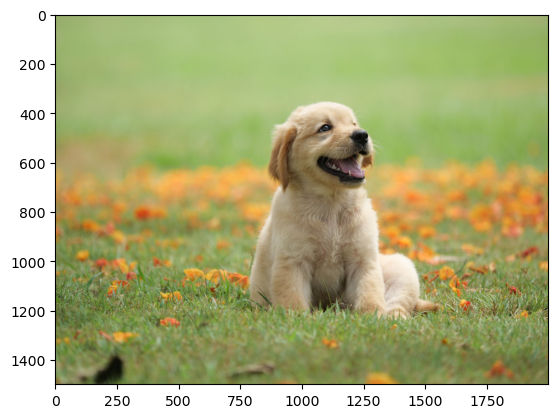

In [17]:
img = img_via_url()
plt.imshow(img)

In [18]:
print(f"Shape of the img: {img.shape}")
print(f"Number of dimensions: {img.ndim}")
print(f"Img data type: {img.dtype}")
print(f"Img type: {type(img)}")

# Note: Retrieving sizes of an img works like matlab! .shape gives you (height, width, RGB-values)

Shape of the img: (1499, 1999, 3)
Number of dimensions: 3
Img data type: uint8
Img type: <class 'numpy.ndarray'>


In [19]:
height = img.shape[0]
width = img.shape[1]


# We can think of width and height as rows and columns! This might help in understanding the following
# Basicly by saying img[0] we refer to the first row. if we want the first pixel in the row we say img[0][0] 
# which means first row first column

# Print all the pixels in the first row
print(f"First row of pixels: {img[0]} \n")

# Print the first pixel in the image
print(f"First pixel: {img[0][0]}")

First row of pixels: [[151 172 107]
 [151 172 107]
 [151 172 107]
 ...
 [157 175 113]
 [157 175 113]
 [157 175 113]] 

First pixel: [151 172 107]


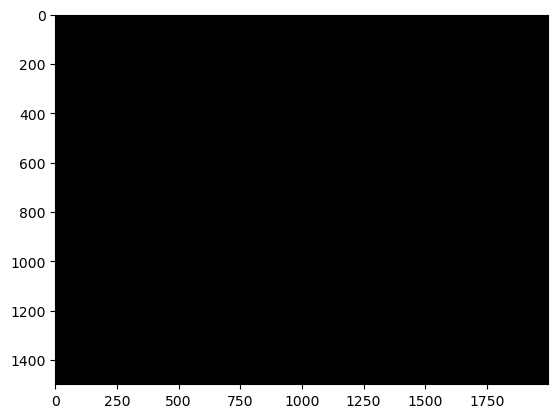

In [20]:
# Note that we have to use img.copy() and not simply copy_img = img!
# Otherwise we overwrite the original img
def paint_img_black(img):
    for row in range(width):
        for column in range(height):
            img[column][row] = [0,0,0]

    plt.imshow(img)
    

copy_img = img.copy()
paint_img_black(copy_img)


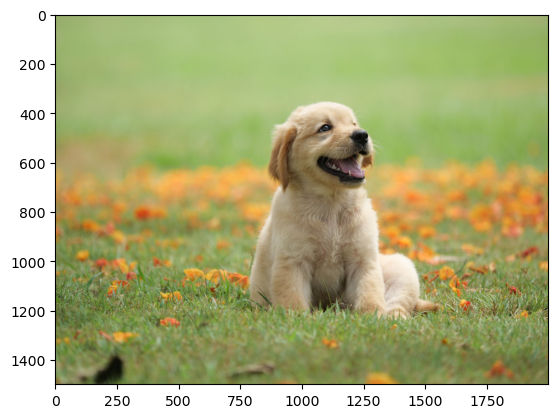

In [21]:
# Ensure we still have the original img
plt.imshow(img)

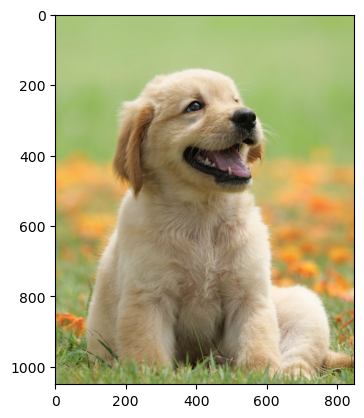

In [27]:
#Q1 Slice out puppy by slicing the numpy array from width 700-1550 pixels and height from 200 pixels to 1250, remeber to use copy!
copy_img = img.copy()
plt.imshow(copy_img)
sliced_img = copy_img[200:1250,700:1550]
plt.imshow(sliced_img)


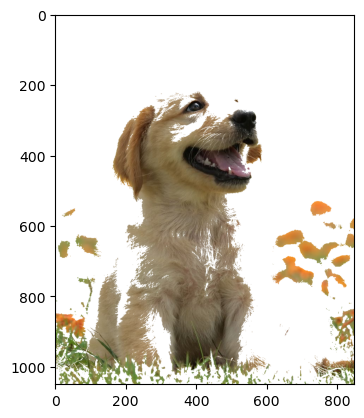

In [29]:
#Q2 Change all pixels with green value > 150 to pre white [255, 255, 255] on the sliced img
#To access for example green you can say img[col][row][1] Order is [Red, Green, Blue]
# Remeber you need to update width and height!

height = sliced_img.shape[0]
width = sliced_img.shape[1]
# Use forloops as we have done above, then an if statement to check if the green value is >150
# Note that we have to use img.copy() and not simply copy_img = img!
# Otherwise we overwrite the original img
copy_img = sliced_img.copy()

for row in range(width):
    for column in range(height):
        if copy_img[column][row][1] > 150 :
            copy_img[column][row] = [255,255,255]

plt.imshow(copy_img)


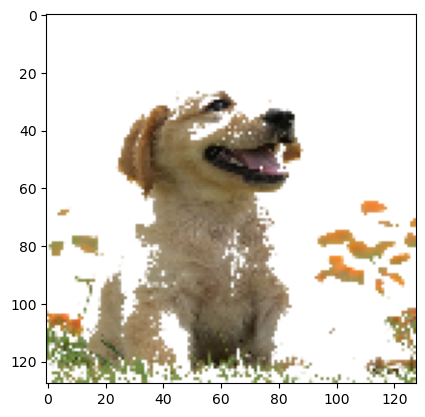

In [35]:
#Q3 Resize the sliced img to a 128x128 img, Hint: Google cv2.resize
resized_img = cv2.resize(copy_img,(128,128))
plt.imshow(resized_img)

In [36]:
#Q4 Using the resized image, flatten it into a numpy array of shape (width*height*3, 1).
# Hint: Use x.reshape(-1, 1). Why -1? Well that puts all the content of the array x in one array
# The 1 then allows us to make it a column vector. Do Google what does -1 mean in reshape. It is important!
flattened_img = copy_img.reshape(-1,1)

print(flattened_img.shape)
print(flattened_img)

(2677500, 1)
[[255]
 [255]
 [255]
 ...
 [141]
 [149]
 [ 74]]
